
### Compare Algorithms



In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import model_selection,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import statistics
import seaborn as sns

In [ ]:
# load dataset
data = pd.read_csv('dataset_comb.csv')
data = data.sample(frac = 1)
data.drop(['id'], axis = 1, inplace = True)
col = list(data.columns)
col.pop()
X = data[col].to_numpy()
X = preprocessing.normalize(X)
Y = data['Class'].to_numpy()
le = preprocessing.LabelEncoder()
le.fit(Y)
Y = np.array(le.transform(Y))

In [ ]:
Y

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Percep', Perceptron()))
models.append(('ANN',  MLPClassifier()))




In [ ]:
# evaluate each model in turn
results_test = []
results_train = []
names = []


scoring = 'accuracy'
for name, model in models:
  """
	kfold = model_selection.KFold(n_splits=7)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results*100)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 """
  names.append(name)
  k = model_selection.KFold(7, random_state=1, shuffle = True)
  accuracy_test = []
  accuracy_train = []
  for train_index, test_index in k.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #importing model from sklearn 
    clf = model
    clf.fit( X_train,  y_train)
    
    #predict class
    test_pred = clf.predict(X_test)
    train_pred = clf.predict(X_train)
      
    #calculating and appending accuracies
    acc1_test = accuracy_score(y_test, test_pred)
    accuracy_test.append(acc1_test)
      
    acc2_train = accuracy_score(y_train, train_pred)
    accuracy_train.append(acc2_train)

  results_train.append(accuracy_train)
  results_test.append(accuracy_test)
  #printing accuracies 
  print("%s:" % (name))
  print("Mean accuracy for test set = ", statistics.mean(accuracy_test))
  print("Mean accuracy for train set = ", statistics.mean(accuracy_train))


LR:
Mean accuracy for test set =  0.8080823871041043
Mean accuracy for train set =  0.8084044880451432
LDA:
Mean accuracy for test set =  0.9858676574468734
Mean accuracy for train set =  0.9859316319843472
NB:
Mean accuracy for test set =  0.9686005911362758
Mean accuracy for train set =  0.9685821667038693
SVM:
Mean accuracy for test set =  0.9788837766389588
Mean accuracy for train set =  0.9789661862833886
Percep:
Mean accuracy for test set =  0.9816333771919404
Mean accuracy for train set =  0.982549714577174


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ANN:
Mean accuracy for test set =  0.9842178674723066
Mean accuracy for train set =  0.9843552426131827


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
names

['LR', 'LDA', 'NB', 'SVM', 'Percep', 'ANN']

In [ ]:
dat = pd.DataFrame(np.array(results_test).T)

In [ ]:
dat.columns = names

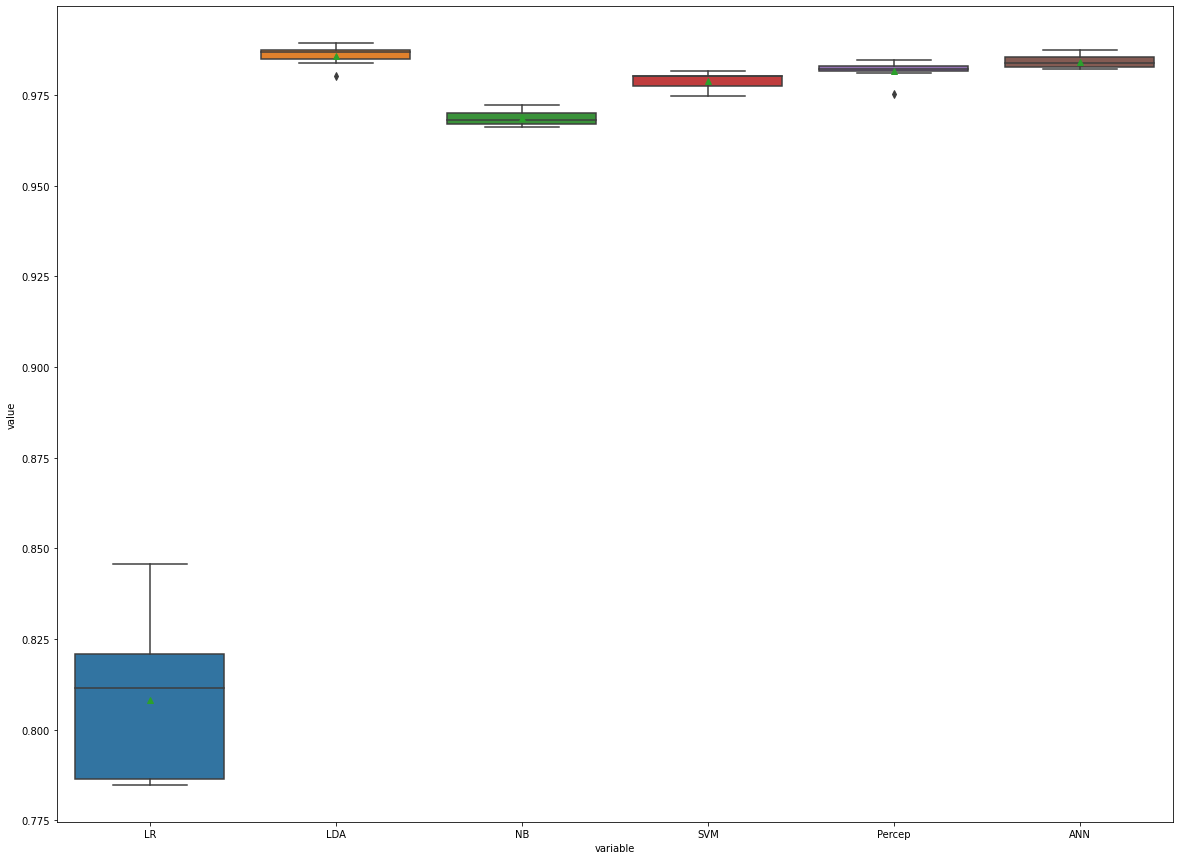

In [ ]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x = 'variable', y = 'value', data = pd.melt(dat), showmeans = True)